#### Q: Predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors

 We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Data downlaoded form https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND using station ID USW00024233
and from  https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [142]:
# Import libraies and load the data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('2421096.csv', index_col='DATE', parse_dates=True)

In [124]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [94]:
counts.tail()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2020-12-31 19:00:00,27.0,11.0,16.0
2020-12-31 20:00:00,18.0,9.0,9.0
2020-12-31 21:00:00,18.0,9.0,9.0
2020-12-31 22:00:00,9.0,3.0,6.0
2020-12-31 23:00:00,8.0,3.0,5.0


In [125]:
counts.shape

(138542, 3)

The dataset has 138542 records with 3 col/attributes

In [126]:
# Let us find basic info
counts.info()
# It shows the data has no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138542 entries, 2019-11-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          138521 non-null  float64
 1   Fremont Bridge East Sidewalk  138521 non-null  float64
 2   Fremont Bridge West Sidewalk  138521 non-null  float64
dtypes: float64(3)
memory usage: 4.2 MB


In [127]:
counts.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

In [128]:
counts.dtypes

Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [129]:
counts.isnull()
# No Null values

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,False,False,False
2019-11-01 01:00:00,False,False,False
2019-11-01 02:00:00,False,False,False
2019-11-01 03:00:00,False,False,False
2019-11-01 04:00:00,False,False,False
...,...,...,...
2020-12-31 19:00:00,False,False,False
2020-12-31 20:00:00,False,False,False
2020-12-31 21:00:00,False,False,False


In [130]:
# which columns have null values
counts.isnull().any()
# No column has any null values

Fremont Bridge Total            True
Fremont Bridge East Sidewalk    True
Fremont Bridge West Sidewalk    True
dtype: bool

In [131]:
# each column the percentage of null values 
counts.isnull().sum() / counts.shape[0]

Fremont Bridge Total            0.000152
Fremont Bridge East Sidewalk    0.000152
Fremont Bridge West Sidewalk    0.000152
dtype: float64

In [132]:
# Basic Stat
counts.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [133]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02
DATE,,,,,,,,,,,,,,,,
2021-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,0.42,0.0,0.0,48,52,45,220.0,220.0,23.0,30.0,1.0,NaN
2021-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.11,NaN,1.71,0.0,0.0,48,49,41,170.0,180.0,28.0,36.0,1.0,NaN
2021-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,0.44,0.0,0.0,44,48,38,110.0,220.0,21.0,25.9,1.0,NaN
2021-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,0.39,0.0,0.0,47,51,43,240.0,100.0,23.9,31.1,1.0,NaN
2021-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.29,NaN,0.66,0.0,0.0,44,47,42,180.0,180.0,23.9,32.0,1.0,NaN


In [134]:
weather.shape

(19, 16)

In [135]:
weather.columns

Index(['STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02'],
      dtype='object')

In [136]:
weather.dtypes

STATION     object
NAME        object
AWND       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG         int64
TMAX         int64
TMIN         int64
WDF2       float64
WDF5       float64
WSF2       float64
WSF5       float64
WT01       float64
WT02       float64
dtype: object

Next we will compute the total daily bicycle traffic, and put this in its own dataframe

In [152]:
daily = counts.resample('d').sum() # To resample Time Series data. d is for daily binning
daily['Total'] = daily.sum(axis=1) # To add the col we used sum axis =1
daily = daily[['Total']] # remove other columns

In [153]:
daily

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0
...,...
2020-12-27,1752.0
2020-12-28,3516.0
2020-12-29,2084.0


We saw previously that the patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week. 

In [154]:
# We will use for loop to convert days into weeks
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [155]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

<ipython-input-156-ff16be9d878c>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

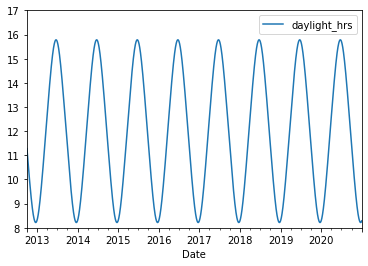

In [156]:
# We define our own function
def hours_of_daylight(date, axis=23.44, latitude=47.61): 
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

We can also add  the average temperature and  total precipitation to the data. In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [157]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])  # For avg weather

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])  # Concat daily and weather df to make a new frame 

Finally, let's add a counter that increases from day 1, and measures how many years have passed. This will let us measure any observed annual increase or decrease in daily crossings:

In [158]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [159]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,NaN,NaN,NaN,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,NaN,NaN,NaN,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,NaN,NaN,NaN,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,NaN,NaN,NaN,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,NaN,NaN,NaN,0.010959


Here we first created a data frame daily total bike traffic. Then we added daily traffic M-S. added holidays using USFederalHolidayCalendar,defined new function for hours of daylight, added avg temperature and prec from weather df and concated. then we added annual observed counter.


With this in place, we can choose the columns to use, and fit a linear regression model to our data. We will set fit_intercept = False, because the daily flags essentially operate as their own day-specific intercepts:

In [161]:
# Drop any rows with null values
# daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs',  'annual']
# Define x and y, fit the model
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
yhat = model.predict(X)

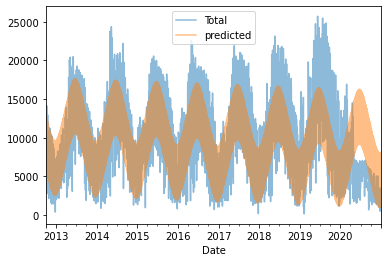

In [162]:
#Finally, we can compare the total and predicted bicycle traffic visually
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures). Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [163]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              436.377489
Tue              860.066020
Wed              779.162327
Thu              211.804708
Fri             -995.032151
Sat            -6056.010349
Sun            -6228.529897
holiday        -3792.988413
daylight_hrs    1073.192830
annual          -196.726654
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty. We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [164]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

With these errors estimated, let's again look at the results:

In [165]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            436.0  372.0
Tue            860.0  367.0
Wed            779.0  368.0
Thu            212.0  358.0
Fri           -995.0  364.0
Sat          -6056.0  359.0
Sun          -6229.0  360.0
holiday      -3793.0  450.0
daylight_hrs  1073.0   25.0
annual        -197.0   34.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays. We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).